In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np

/opt/anaconda3/envs/SLResearch/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
shapefile = gpd.read_file("/Users/sashanksilwal/Desktop/SLResearch/NoteBooks/Week6/New_example_data/shapefile/UAE_habitats_new.shp")
shapefile.crs

<Projected CRS: EPSG:32640>
Name: WGS 84 / UTM zone 40N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 54°E to 60°E - by country
- bounds: (54.0, 0.0, 60.0, 84.0)
Coordinate Operation:
- name: UTM zone 40N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
shapefile.head()

,OBJECTID,Id,HabitatTyp,HabitatT_1,HabitatSub,HabitatS_1,RuleID,Shape_Leng,Shape_Area,Habitats,geometry
0,1,1,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,7524.321019,2.115300e+06,Intertidal Habitats,"POLYGON ((194075.975 2671979.549, 194105.053 2..."
1,2,2,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,48704.931412,7.777595e+06,Intertidal Habitats,"POLYGON ((202477.763 2674966.027, 203045.295 2..."
2,3,3,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,2721.521261,1.367130e+05,Intertidal Habitats,"POLYGON ((205824.217 2675669.812, 205805.696 2..."
3,4,4,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,10010.231740,1.424318e+06,Intertidal Habitats,"POLYGON ((199076.749 2676693.733, 199083.231 2..."
4,5,5,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,60239.031422,1.222009e+07,Intertidal Habitats,"POLYGON ((212836.986 2678391.436, 212806.558 2..."


In [4]:
shapefile.columns

Index(['OBJECTID', 'Id', 'HabitatTyp', 'HabitatT_1', 'HabitatSub',
       'HabitatS_1', 'RuleID', 'Shape_Leng', 'Shape_Area', 'Habitats',
       'geometry'],
      dtype='object')

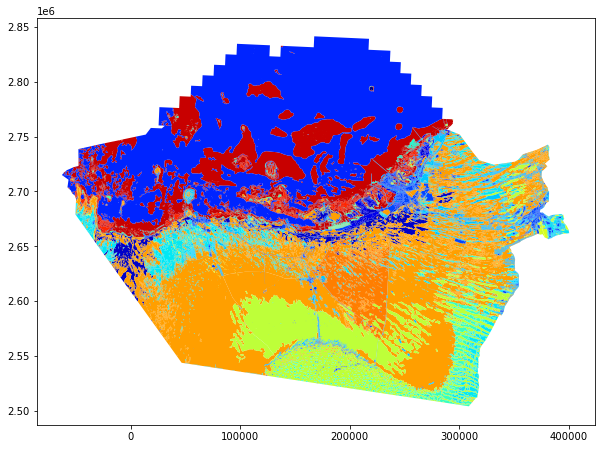

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = 'Habitats', cmap='jet')

In [7]:
import rasterio
from rasterio.plot import show
import rasterstats


In [9]:
dir(shapefile)

['CachedAccessor',
 'HabitatS_1',
 'HabitatSub',
 'HabitatT_1',
 'HabitatTyp',
 'Habitats',
 'Id',
 'OBJECTID',
 'RuleID',
 'Shape_Area',
 'Shape_Leng',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 

In [11]:
shapefile.geometry

0        POLYGON ((194075.975 2671979.549, 194105.053 2...
1        POLYGON ((202477.763 2674966.027, 203045.295 2...
2        POLYGON ((205824.217 2675669.812, 205805.696 2...
3        POLYGON ((199076.749 2676693.733, 199083.231 2...
4        POLYGON ((212836.986 2678391.436, 212806.558 2...
                               ...                        
68407    POLYGON ((-20557.825 2735120.914, -20766.769 2...
68408    POLYGON ((-28550.178 2739881.864, -28545.218 2...
68409    POLYGON ((-37984.586 2739126.344, -38167.156 2...
68410    POLYGON ((-23638.812 2743185.475, -23631.122 2...
68411    POLYGON ((72989.390 2678674.537, 73025.681 267...
Name: geometry, Length: 68412, dtype: geometry

In [12]:
shapefile.bounds

,minx,miny,maxx,maxy
0,193423.0379,2.670536e+06,195865.8116,2.672126e+06
1,195135.8643,2.671101e+06,203045.2952,2.675415e+06
2,204584.6732,2.675344e+06,205824.2173,2.675677e+06
3,197462.7872,2.675390e+06,200501.8899,2.676847e+06
4,202510.3400,2.673564e+06,212836.9855,2.678673e+06
...,...,...,...,...
68407,-22729.4124,2.735028e+06,-20414.9913,2.737104e+06
68408,-29271.1847,2.739547e+06,-28533.1889,2.740592e+06
68409,-47536.1606,2.728698e+06,-36928.6086,2.740942e+06
68410,-38619.5873,2.727573e+06,-21863.6339,2.743832e+06


In [13]:
shapefile.loc

In [14]:
dir(shapefile)

['CachedAccessor',
 'HabitatS_1',
 'HabitatSub',
 'HabitatT_1',
 'HabitatTyp',
 'Habitats',
 'Id',
 'OBJECTID',
 'RuleID',
 'Shape_Area',
 'Shape_Leng',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 

In [15]:
# <Projected CRS: EPSG:32640>
# Name: WGS 84 / UTM zone 40N
# Axis Info [cartesian]:
# - E[east]: Easting (metre)
# - N[north]: Northing (metre)
# Area of Use:
# - name: World - N hemisphere - 54°E to 60°E - by country
# - bounds: (54.0, 0.0, 60.0, 84.0)
# Coordinate Operation:
# - name: UTM zone 40N
# - method: Transverse Mercator
# Datum: World Geodetic System 1984
# - Ellipsoid: WGS 84
# - Prime Meridian: Greenwich

SyntaxError: invalid syntax (<ipython-input-15-cdb0a74bbf4d>, line 1)

In [16]:
dir(shapefile)

['CachedAccessor',
 'HabitatS_1',
 'HabitatSub',
 'HabitatT_1',
 'HabitatTyp',
 'Habitats',
 'Id',
 'OBJECTID',
 'RuleID',
 'Shape_Area',
 'Shape_Leng',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 

In [17]:
shapefile.shape

(68412, 11)

In [18]:
a = shapefile.to_numpy

In [19]:
a

<bound method DataFrame.to_numpy of        OBJECTID     Id  HabitatTyp             HabitatT_1  HabitatSub  \
0             1      1        1000    Intertidal Habitats        1010   
1             2      2        1000    Intertidal Habitats        1010   
2             3      3        1000    Intertidal Habitats        1010   
3             4      4        1000    Intertidal Habitats        1010   
4             5      5        1000    Intertidal Habitats        1010   
...         ...    ...         ...                    ...         ...   
68407     68408  27749       17000  Deep Sub-Tidal Seabed       17000   
68408     68409  27750       17000  Deep Sub-Tidal Seabed       17000   
68409     68410  27751       17000  Deep Sub-Tidal Seabed       17000   
68410     68411  27752       17000  Deep Sub-Tidal Seabed       17000   
68411     68412  27753       17000  Deep Sub-Tidal Seabed       17000   

                                  HabitatS_1  RuleID    Shape_Leng  \
0      Mudflats A